# 06 Read and plot SBAS time series

## <a name="quicklink">Quick link

* [Objective](#objective)
* [Data](#data)
* [Workflow](#workflow)
* [License](#license)

## <a name="objective">Objective 

The objective is to:
* Download a SBAS EPOSAR processing service result
* Inspect the data
* Plot the mean velocity
* Plot the time-series for a given location

## <a name="data">Data

The data used in this notebook is the results of the Geohazards Thematic Exploitation Platform public job "S1 Italy T117 Asc Bignami's data set".

The service used to generate this time-series is CNR-IREA's EPOSAR.

## <a name="workflow">Workflow

#### Import the Python modules used for the different steps

In [1]:
import os
import tarfile
import pandas as pd
from six.moves import urllib
import matplotlib.pyplot as plt

#### Download and extract the SBAS EPOSAR result

In [2]:
url_sbas = 'http://sb-10-15-34-45.gep.terradue.int:50075/webhdfs/v1/ciop/run/dcs-sbas/0000003-170701000028464-oozie-oozi-W/_results/SBAS_TS_20150129_20170124.txt.tgz?op=OPEN&offset=0'
tgz_path = 'SBAS_TS_20150129_20170124.txt.tgz'
sbas_txt = 'SBAS_TS_20150129_20170124.txt'

urllib.request.urlretrieve(url_sbas, tgz_path)

sbas_tgz = tarfile.open(tgz_path)
sbas_tgz.extractall()
sbas_tgz.close()

#### Read the first 30 lines of the result

In [3]:
with open(sbas_txt) as myfile:
    head = [next(myfile) for x in xrange(30)]
print head

['####\n', 'Data_Type: LOS_Displacement_Time_Series\n', 'Processing_ID:  \n', 'User_ID: CNR-IREA\n', 'Software_version: CNR-IREA P-SBAS 24\n', 'Applied_algorithm_description: Parallel SBAS Interferometry Chain\n', 'Main_reference: 10.1109/TGRS.2002.803792, 10.1109/JSTARS.2014.2322671\n', 'Date_of_production: 20170711T23:12:18Z\n', 'Date_of_publication: 20170711T23:12:18Z\n', 'Service_used_for_generation: CNR-IREA EPOSAR\n', 'Geographic_CS_Type_Code: 4326\n', 'Spatial_Resolution: 74\n', 'Sensor: S1\n', 'Mode: IW\n', 'Antenna_Side: Right\n', 'Relative_Orbit_Number: 117\n', 'Wavelenght: 0.055465760\n', 'Number_of_dates:  26\n', 'Time_Years:  2015.0814, 2015.1456, 2015.1851, 2015.3490, 2015.6741, 2015.7399, 2015.7739, 2015.9378, 2015.9707, 2016.0348, 2016.0677, 2016.0990, 2016.1319, 2016.2015, 2016.2344, 2016.5622, 2016.6428, 2016.7399, 2016.7574, 2016.7903, 2016.8232, 2016.8545, 2016.9038, 2016.9214, 2017.0513, 2017.0677\n', 'List_of_Dates: 20150129T17:05:29Z, 20150222T17:05:28Z, 20150306

#### Get reference point

In [4]:
head[21]

'Reference_Point: 10.839888 41.956383\n'

#### Get the list of dates

In [5]:
head[19]

'List_of_Dates: 20150129T17:05:29Z, 20150222T17:05:28Z, 20150306T17:05:28Z, 20150505T17:05:33Z, 20150902T17:05:37Z, 20150926T17:05:37Z, 20151008T17:05:38Z, 20151207T17:05:38Z, 20151219T17:05:37Z, 20160112T17:05:36Z, 20160124T17:05:36Z, 20160205T17:05:36Z, 20160217T17:05:31Z, 20160312T17:05:36Z, 20160324T17:05:36Z, 20160722T17:05:50Z, 20160821T17:05:09Z, 20160926T17:05:11Z, 20161002T17:05:53Z, 20161014T17:05:52Z, 20161026T17:05:53Z, 20161107T17:05:53Z, 20161125T17:05:10Z, 20161201T17:05:52Z, 20170118T17:05:49Z, 20170124T17:05:07Z\n'

In [6]:
list_of_dates = head[19].split()
del(list_of_dates[0])
list_of_dates = [s.strip(',') for s in list_of_dates]

In [7]:
list_of_dates

['20150129T17:05:29Z',
 '20150222T17:05:28Z',
 '20150306T17:05:28Z',
 '20150505T17:05:33Z',
 '20150902T17:05:37Z',
 '20150926T17:05:37Z',
 '20151008T17:05:38Z',
 '20151207T17:05:38Z',
 '20151219T17:05:37Z',
 '20160112T17:05:36Z',
 '20160124T17:05:36Z',
 '20160205T17:05:36Z',
 '20160217T17:05:31Z',
 '20160312T17:05:36Z',
 '20160324T17:05:36Z',
 '20160722T17:05:50Z',
 '20160821T17:05:09Z',
 '20160926T17:05:11Z',
 '20161002T17:05:53Z',
 '20161014T17:05:52Z',
 '20161026T17:05:53Z',
 '20161107T17:05:53Z',
 '20161125T17:05:10Z',
 '20161201T17:05:52Z',
 '20170118T17:05:49Z',
 '20170124T17:05:07Z']

#### Assemble the header 

In [9]:
head[29]

'      ID,       Lat,        Lon,    Topo,      Vel,      Coer,      cosN,      cosE,      cosU,  TS\n'

In [10]:
header = head[29].split()
del(header[len(header)-1])
header = [s.strip(',') for s in header]

In [11]:
header

['ID', 'Lat', 'Lon', 'Topo', 'Vel', 'Coer', 'cosN', 'cosE', 'cosU']

In [13]:
df_header = header + list_of_dates
df_header

['ID',
 'Lat',
 'Lon',
 'Topo',
 'Vel',
 'Coer',
 'cosN',
 'cosE',
 'cosU',
 '20150129T17:05:29Z',
 '20150222T17:05:28Z',
 '20150306T17:05:28Z',
 '20150505T17:05:33Z',
 '20150902T17:05:37Z',
 '20150926T17:05:37Z',
 '20151008T17:05:38Z',
 '20151207T17:05:38Z',
 '20151219T17:05:37Z',
 '20160112T17:05:36Z',
 '20160124T17:05:36Z',
 '20160205T17:05:36Z',
 '20160217T17:05:31Z',
 '20160312T17:05:36Z',
 '20160324T17:05:36Z',
 '20160722T17:05:50Z',
 '20160821T17:05:09Z',
 '20160926T17:05:11Z',
 '20161002T17:05:53Z',
 '20161014T17:05:52Z',
 '20161026T17:05:53Z',
 '20161107T17:05:53Z',
 '20161125T17:05:10Z',
 '20161201T17:05:52Z',
 '20170118T17:05:49Z',
 '20170124T17:05:07Z']

#### Get the SBAS time series data as a pandas dataframe

In [15]:
sbas_ts = pd.read_csv(sbas_txt, sep=',', skiprows=30, names= df_header)

In [17]:
sbas_ts.head(10)

,ID,Lat,Lon,Topo,Vel,Coer,cosN,cosE,cosU,20150129T17:05:29Z,...,20160821T17:05:09Z,20160926T17:05:11Z,20161002T17:05:53Z,20161014T17:05:52Z,20161026T17:05:53Z,20161107T17:05:53Z,20161125T17:05:10Z,20161201T17:05:52Z,20170118T17:05:49Z,20170124T17:05:07Z
0,0,43.01001,10.59320,-35.86,0.5029,0.883887,-0.095390,-0.500529,0.860449,-0.0,...,0.9938,-0.7324,-0.8803,1.8948,1.7009,0.0089,0.3082,0.6686,1.6943,0.2205
1,1,43.11071,10.56762,63.50,1.5889,0.859437,-0.095429,-0.500627,0.860387,-0.0,...,3.3996,1.3106,1.3126,3.7023,3.9602,1.3783,2.1215,2.1735,3.8057,2.2349
2,2,42.96205,10.60703,-38.05,0.6670,0.894586,-0.095391,-0.500635,0.860387,-0.0,...,0.7105,-0.2253,-0.2527,1.7526,1.5509,0.5026,0.1755,0.8873,2.1705,0.4318
3,3,43.01079,10.59418,-25.55,0.1472,0.846190,-0.095402,-0.500630,0.860388,-0.0,...,0.3551,-0.9777,-0.9387,1.0518,1.1282,-0.5085,-0.3675,0.0924,1.2275,-0.1438
4,4,43.01203,10.59386,-28.47,1.3279,0.893704,-0.095403,-0.500630,0.860388,-0.0,...,2.6026,1.2345,1.1025,3.3886,3.2630,1.8303,2.1895,2.2725,3.1941,1.9412
5,5,43.02744,10.58970,-40.35,0.3369,0.869362,-0.095405,-0.500618,0.860395,-0.0,...,1.4224,-0.8267,-0.6452,1.1078,1.3664,-0.2556,0.2605,0.2271,1.1946,-0.1935
6,6,43.04419,10.58601,13.23,1.2209,0.882872,-0.095420,-0.500696,0.860348,-0.0,...,2.2141,0.5032,0.6979,2.2344,2.5169,1.2484,1.6014,1.8183,2.6583,1.2923
7,7,43.04482,10.58591,17.49,1.2855,0.885603,-0.095421,-0.500704,0.860343,-0.0,...,2.2302,0.5680,0.6217,2.2606,2.7220,1.1482,1.8920,1.9164,3.0996,1.9249
8,8,43.06036,10.58264,59.49,1.3873,0.855808,-0.095438,-0.500793,0.860289,-0.0,...,2.8180,0.7873,0.9700,2.5521,2.9749,1.4057,1.9519,1.8702,3.1236,1.7680
9,9,43.06284,10.58209,69.84,1.2572,0.877758,-0.095440,-0.500804,0.860283,-0.0,...,2.7739,1.0147,1.2221,2.6504,3.4808,1.3785,2.0449,2.1447,3.2641,1.8437


In [19]:
sbas_ts.loc[sbas_ts['Lat'] == 0]

,ID,Lat,Lon,Topo,Vel,Coer,cosN,cosE,cosU,20150129T17:05:29Z,...,20160821T17:05:09Z,20160926T17:05:11Z,20161002T17:05:53Z,20161014T17:05:52Z,20161026T17:05:53Z,20161107T17:05:53Z,20161125T17:05:10Z,20161201T17:05:52Z,20170118T17:05:49Z,20170124T17:05:07Z
12,12,0.0,0.0,-63.42,1.3578,0.895168,0.0,0.0,0.0,-0.0,...,3.2191,-0.3025,0.5628,4.4038,4.0268,1.4373,1.3059,1.4876,3.6922,1.7034
1453,1453,0.0,0.0,-52.16,0.6022,0.800898,0.0,0.0,0.0,-0.0,...,2.1055,0.7940,1.1719,1.5921,1.9637,0.8890,1.2023,1.2229,1.2970,0.5821
1514,1514,0.0,0.0,-54.07,0.9658,0.998341,0.0,0.0,0.0,-0.0,...,1.5070,1.2383,1.3512,2.1166,2.1742,2.0211,2.0553,2.3131,2.5509,1.8792
6065,6065,0.0,0.0,-51.61,-1.3495,0.811477,0.0,0.0,0.0,-0.0,...,-2.1024,-2.3729,-2.2679,-2.4688,-2.2333,-2.4237,-2.3866,-2.4738,-3.0523,-2.9640
6085,6085,0.0,0.0,-57.28,-1.2910,0.824207,0.0,0.0,0.0,-0.0,...,-1.9046,-2.2043,-2.1801,-2.3285,-2.1589,-2.1773,-1.9880,-2.1712,-2.6874,-2.5272
17628,17628,0.0,0.0,-38.42,-1.3276,0.893463,0.0,0.0,0.0,-0.0,...,-1.8627,-2.4345,-1.9336,-2.1029,-1.7997,-2.1854,-2.1792,-2.3388,-2.5389,-2.6964
17719,17719,0.0,0.0,-41.06,-1.0751,0.852959,0.0,0.0,0.0,-0.0,...,-1.5224,-2.0241,-1.5673,-1.1978,-1.1472,-1.5662,-1.9810,-1.7321,-1.7496,-1.9847
43000,43000,0.0,0.0,37.91,-1.1208,0.872641,0.0,0.0,0.0,-0.0,...,-2.2255,0.5653,-0.5834,0.4177,-0.2844,-1.2148,-0.7642,-0.7898,-5.1266,-1.2061
44021,44021,0.0,0.0,13.45,-0.1823,0.861144,0.0,0.0,0.0,-0.0,...,-0.8833,1.9703,1.2162,1.5105,0.8428,0.0092,-0.0248,0.1154,-3.7426,0.0822
44149,44149,0.0,0.0,28.79,-0.4748,0.991572,0.0,0.0,0.0,-0.0,...,-1.0241,1.3956,0.7485,1.0451,0.5621,-0.5313,-0.2772,-0.2233,-3.8366,-0.1212


Filter for the points with latitude value equal to zero

In [20]:
sbas_ts = sbas_ts[sbas_ts['Lat'] != 0]

#### Plot the data

/opt/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


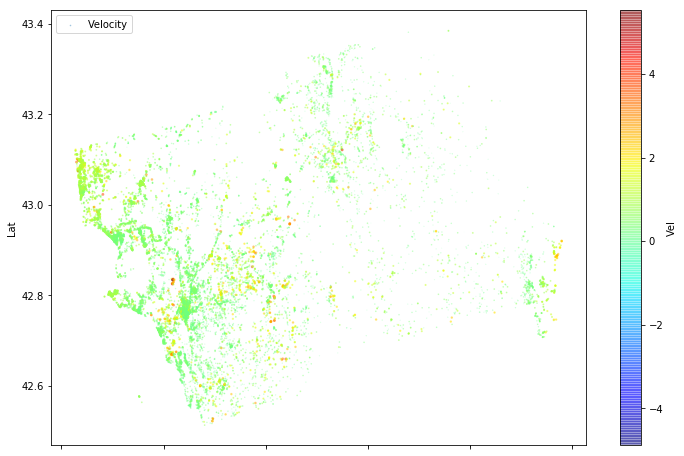

In [21]:
import matplotlib.pyplot as plt

sbas_ts.plot(kind="scatter", x="Lon", y="Lat",
    s=sbas_ts['Vel'], label="Velocity",
 c="Vel", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(12,8))
plt.show()

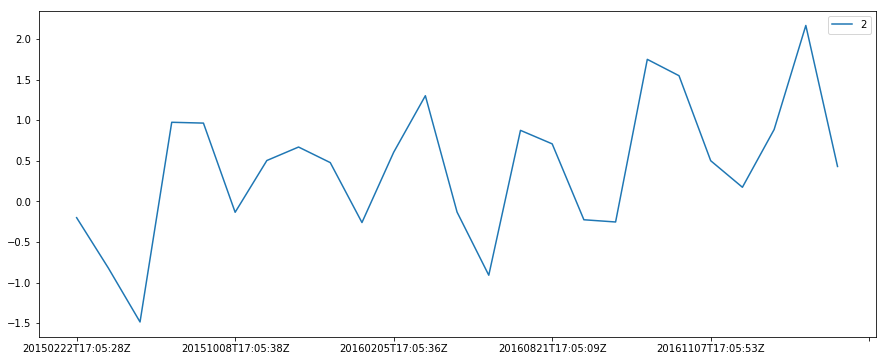

In [22]:
sbas_ts.iloc[2:3,10:35].transpose().plot(figsize=(15,6))
plt.show()

## <a name="license">License

This work is licenced under a [Attribution-ShareAlike 4.0 International License (CC BY-SA 4.0)](http://creativecommons.org/licenses/by-sa/4.0/) 

YOU ARE FREE TO:

* Share - copy and redistribute the material in any medium or format.
* Adapt - remix, transform, and built upon the material for any purpose, even commercially.

UNDER THE FOLLOWING TERMS:

* Attribution - You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
* ShareAlike - If you remix, transform, or build upon the material, you must distribute your contributions under the same license as the original.